### Missing Data in Machine Learning

**Missing data** refers to the absence of values in a dataset where they are expected. This can occur due to various reasons, such as data entry errors, data loss, or the omission of responses in surveys. In machine learning, missing data is a significant issue because most algorithms require complete datasets to function correctly. 


#### **Types of Missing Data**
**MCAR (Missing Completely at Random):**

- Data is missing entirely by chance, and the missingness is not related to any observed or unobserved variables.
- Example: A survey respondent accidentally skips a question.

**MAR (Missing at Random):**
- Missingness is related to observed data but not to the missing data itself.
- Example: Older respondents are more likely to skip a question on technology usage.

**MNAR (Missing Not at Random):**
- Missingness is related to the missing data itself.
- Example: Respondents with lower income might choose not to disclose their income level.


#### **Impact of Missing Data in Machine Learning**
1. **Bias in Analysis:** Missing data can lead to biased estimates and predictions if the absence of data is not random.
2. **Loss of Data** 
3. **Reduction in Model Accuracy** 
4. **Complexity in Data Processing** 
5. **Impact of Feature Engineering** 
6. **Issue in Model Evaluation** 
7. **Challenges in Deploying Model** 

### Ways to Handle Missing Data

1. **Remove Data:**
   - **Drop Rows:** Remove rows with missing values. This method is simple but can lead to a loss of valuable information.
   - **Drop Columns:** Remove entire columns that have missing values. This is used when a feature has a large amount of missing data.

2. **Imputation:**
   - **Mean/Median Imputation:** Replace missing values with the mean or median of the non-missing values in the column.
   - **Mode Imputation:** Replace missing values with the mode (most frequent value) for categorical variables.
   - **K-Nearest Neighbors (KNN) Imputation:** Use the nearest neighbors to predict the missing value.
   - **Predictive Modeling:** Use a machine learning model to predict and fill in missing values.

3. **Using Algorithms that Support Missing Values:**
   - Some algorithms, like decision trees and XGBoost, can handle missing data internally.

### Feature Engine Imputers

1. **MeanMedianImputer:**
   - This imputer replaces missing values with the mean or median of the non-missing values in a feature.
   - **Use Case:** Suitable when missing data is assumed to be randomly distributed and not correlated with other features.

2. **CategoricalImputer:**
   - This imputer replaces missing values in categorical variables with a specific value, typically the most frequent category (mode).
   - **Use Case:** Useful when categorical data has missing values and you want to impute them with a sensible category.

3. **ArbitraryNumberImputer:**
   - This imputer replaces missing values with an arbitrary number that doesn’t appear in the data (e.g., -999, 999, or another chosen value).
   - **Use Case:** Useful when you want to distinguish imputed values from actual data or when missingness itself is meaningful.

4. **EndTailImputer:**
   - This imputer replaces missing values with values at the end tails of the distribution (e.g., the 1st or 99th percentile).
   - **Use Case:** Suitable when missing data might represent outliers or extreme values in the context of the distribution.

5. **AddMissingIndicator:**
   - This technique adds a binary indicator variable for each feature that has missing values. The indicator is 1 if the value was missing and 0 otherwise.
   - **Use Case:** Useful when the fact that a value is missing is itself informative and can contribute to the model's predictions.

6. **RandomSampleImputer:**
   - This imputer replaces missing values by randomly selecting from the observed values in the feature.
   - **Use Case:** Useful when you want to maintain the distribution of the data or when there is no strong reason to prefer one imputation method over another.

These techniques are essential tools in the preprocessing phase of machine learning, allowing you to handle missing data effectively and ensure that your models perform optimally.

In [ ]:
## 1. Import Libraries
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from feature_engine.imputation import (
    MeanMedianImputer, 
    CategoricalImputer, 
    ArbitraryNumberImputer,
    EndTailImputer, 
    AddMissingIndicator,
    RandomSampleImputer
)

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

## 2. Load Data
For demonstration purposes, we'll use a synthetic dataset with missing values.

In [11]:
# Create a sample dataset
np.random.seed(42)
data = {
    'Age': [25, np.nan, 35, 45, np.nan, 50, 43, 39, np.nan, 30],
    'Income': [50000, 60000, np.nan, 80000, np.nan, 120000, 75000, np.nan, 65000, 55000],
    'Gender': ['Male', 'Male', 'Male', np.nan, 'Male', 'Female', 'Female', 'Male', np.nan, 'Female'],
    'Married': ['Yes', 'No', 'No', 'Yes', np.nan, 'No', 'Yes', 'No', 'No', np.nan]
}

df = pd.DataFrame(data)
print("Initial Dataset with Missing Values:")
df.head(10)

Initial Dataset with Missing Values:


,Age,Income,Gender,Married
0,25.0,50000.0,Male,Yes
1,NaN,60000.0,Male,No
2,35.0,NaN,Male,No
3,45.0,80000.0,NaN,Yes
4,NaN,NaN,Male,NaN
5,50.0,120000.0,Female,No
6,43.0,75000.0,Female,Yes
7,39.0,NaN,Male,No
8,NaN,65000.0,NaN,No
9,30.0,55000.0,Female,NaN


In [12]:
df.isnull().sum()

Age        3
Income     3
Gender     2
Married    2
dtype: int64

## 3. Split Data into Training and Testing Sets

In [13]:
# Split the data into training and testing sets
X_train, X_test = train_test_split(df, test_size=0.1, random_state=42)
print("Training Set:")
X_train.head()

Training Set:


,Age,Income,Gender,Married
1,NaN,60000.0,Male,No
5,50.0,120000.0,Female,No
0,25.0,50000.0,Male,Yes
7,39.0,NaN,Male,No
2,35.0,NaN,Male,No


## 4. Handling Missing Data

### 4.1 Mean/Median Imputation
MeanMedianImputer replaces missing values with the mean or median of the feature.


#### **MeanImputer**
- **What It Does**: Replaces missing values with the mean (average) of the observed values in the feature.
- **When to Use**:
  - **Normally Distributed Data**: Best used when the data distribution is approximately normal (bell-shaped curve).
  - **Symmetric Data**: When the data does not have significant outliers or skew.
- **Pros**:
  - Simple and easy to implement.
  - Retains the mean of the feature.
- **Cons**:
  - Sensitive to outliers, which can skew the mean.
  - May not preserve the variance of the data.

#### **MedianImputer**
- **What It Does**: Replaces missing values with the median (middle value) of the observed values in the feature.
- **When to Use**:
  - **Skewed Data**: Best for features with skewed distributions or when there are significant outliers.
  - **Robust to Outliers**: Since the median is less affected by outliers compared to the mean.
- **Pros**:
  - Robust to outliers and skewed data.
  - Better for non-normal distributions.
- **Cons**:
  - Can lose some information about the data's distribution.
  - May not be as effective if the data is nearly normal.

### **Choosing Between Mean and Median Imputation**

- **Use Mean Imputation When**:
  - The data is symmetrically distributed.
  - There are few outliers.
  - The primary goal is to maintain the overall mean of the data.

- **Use Median Imputation When**:
  - The data is skewed or contains outliers.
  - The primary goal is to prevent outliers from influencing the imputation.


In [16]:
mean_median_imputer = MeanMedianImputer(imputation_method='median', variables=['Age', 'Income'])
X_train_imputed = mean_median_imputer.fit_transform(X_train)
print("Dataset after Median Imputation:")
X_train_imputed.head()

Dataset after Median Imputation:


,Age,Income,Gender,Married
1,39.0,60000.0,Male,No
5,50.0,120000.0,Female,No
0,25.0,50000.0,Male,Yes
7,39.0,67500.0,Male,No
2,35.0,67500.0,Male,No


## 4.2 Mode Imputation for Categorical Data
CategoricalImputer replaces missing values with the most frequent category (mode).


**Mode Imputation** involves replacing missing values with the most frequent value (mode) in a feature. Here’s a guide on when and why you might use mode imputation:

### **When to Use Mode Imputation**

1. **Categorical Data**:
   - **Primary Use**: Mode imputation is particularly useful for categorical features where the values are not numerical. It replaces missing categories with the most common category in the dataset.
   - **Example**: For a column representing `color` in a dataset with values like `red`, `blue`, and `green`, mode imputation will replace missing values with the most frequently occurring color.

2. **High Frequency of a Specific Category**:
   - **When a Category Dominates**: If one category is very frequent compared to others, mode imputation helps in maintaining the prevalent pattern in the data.
   - **Example**: In a dataset of customer feedback, if most customers respond with `satisfied`, mode imputation will fill missing responses with `satisfied`.

3. **Data with Few Categories**:
   - **Limited Options**: When a feature has a small number of distinct values, mode imputation is suitable because it is straightforward to determine the most frequent value.
   - **Example**: In a dataset of survey responses with only a few answer options (e.g., `Yes`, `No`, `Maybe`), mode imputation is effective.

4. **Maintaining Distribution of Categorical Features**:
   - **To Preserve Distribution**: For categorical data, replacing missing values with the mode can help maintain the overall distribution of categories in the dataset.
   - **Example**: If `Yes` is the mode in a binary feature, using mode imputation will help retain the distribution of `Yes` responses.




In [17]:
mode_imputer = CategoricalImputer(imputation_method='frequent', variables=['Gender', 'Married'])
X_train_imputed = mode_imputer.fit_transform(X_train_imputed)
print("Dataset after Mode Imputation:")
X_train_imputed.head()

Dataset after Mode Imputation:


,Age,Income,Gender,Married
1,39.0,60000.0,Male,No
5,50.0,120000.0,Female,No
0,25.0,50000.0,Male,Yes
7,39.0,67500.0,Male,No
2,35.0,67500.0,Male,No


## 4.3 Arbitrary Value Imputation
ArbitraryNumberImputer replaces missing values with a user-defined value, which can be useful when the missing value might be informative.

In [18]:
X_train.head()

,Age,Income,Gender,Married
1,NaN,60000.0,Male,No
5,50.0,120000.0,Female,No
0,25.0,50000.0,Male,Yes
7,39.0,NaN,Male,No
2,35.0,NaN,Male,No


In [19]:
arbitrary_imputer = ArbitraryNumberImputer(arbitrary_number=-999, variables=['Income'])
X_train_imputed = arbitrary_imputer.fit_transform(X_train)
print("Dataset after Arbitrary Value Imputation:")
X_train_imputed.head()

Dataset after Arbitrary Value Imputation:


,Age,Income,Gender,Married
1,NaN,60000.0,Male,No
5,50.0,120000.0,Female,No
0,25.0,50000.0,Male,Yes
7,39.0,-999.0,Male,No
2,35.0,-999.0,Male,No


4.4 End of Tail Imputation
EndTailImputer replaces missing values with values at the end of the distribution tail (e.g., far left or far right).

In [20]:
tail_imputer = EndTailImputer(imputation_method='gaussian', tail='right', variables=['Income'])
X_train_imputed = tail_imputer.fit_transform(X_train)
print("Dataset after End Tail Imputation:")
X_train_imputed.head()

Dataset after End Tail Imputation:


,Age,Income,Gender,Married
1,NaN,60000.000000,Male,No
5,50.0,120000.000000,Female,No
0,25.0,50000.000000,Male,Yes
7,39.0,150209.857708,Male,No
2,35.0,150209.857708,Male,No


## 4.5 Adding Missing Indicator
AddMissingIndicator creates a new binary variable to indicate whether the original feature had missing values.


**Missing Indicator** involves creating a binary indicator variable to flag missing values. This technique is useful in various scenarios to ensure that the missingness information is retained and used in modeling. Here’s when and why to use a missing indicator:

### **When to Use a Missing Indicator**

1. **Informative Missingness**:
   - **When Missingness is Informative**: If the fact that a value is missing could itself be informative or carry some meaning about the data or the target variable, a missing indicator can capture this information.
   - **Example**: In a credit scoring model, if a value for `income` is missing, it might indicate something about the individual's financial situation or their willingness to disclose information.

2. **Preserving Data Structure**:
   - **When You Want to Keep the Original Data Structure**: A missing indicator helps in preserving the structure of the original feature while providing additional information about the missing values.
   - **Example**: For a feature like `salary`, instead of imputing the missing values with mean or median, you can add a binary indicator to show which entries were missing.

3. **Handling Missing Data in High-Stakes Features**:
   - **When Features are Crucial**: For features that are critical to the model but have significant missing values, a missing indicator can help in leveraging the presence of missing data as part of the model’s input.
   - **Example**: In predicting customer churn, if a feature like `last_purchase_date` is missing, adding a missing indicator might help in understanding churn patterns.

4. **Improving Model Performance**:
   - **When Imputation May Introduce Bias**: In some cases, imputing missing values might introduce bias or inaccuracies. A missing indicator helps avoid this by using the missingness information directly.
   - **Example**: For a feature with non-random missing values, using imputation might not be ideal. A missing indicator can complement imputation by providing additional context.



In [21]:
missing_indicator = AddMissingIndicator(variables=['Age', 'Income'])
X_train_imputed = missing_indicator.fit_transform(X_train)
print("Dataset after Adding Missing Indicator:")
X_train_imputed.head()

Dataset after Adding Missing Indicator:


,Age,Income,Gender,Married,Age_na,Income_na
1,NaN,60000.0,Male,No,1,0
5,50.0,120000.0,Female,No,0,0
0,25.0,50000.0,Male,Yes,0,0
7,39.0,NaN,Male,No,0,1
2,35.0,NaN,Male,No,0,1


## 4.6 Random Sample Imputation
RandomSampleImputer replaces missing values with a random sample of the existing values in the feature.

In [22]:
random_imputer = RandomSampleImputer(random_state=42, variables=['Age', 'Income'])
X_train_imputed = random_imputer.fit_transform(X_train)
print("Dataset after Random Sample Imputation:")
X_train_imputed.head()

Dataset after Random Sample Imputation:


,Age,Income,Gender,Married
1,43.0,60000.0,Male,No
5,50.0,120000.0,Female,No
0,25.0,50000.0,Male,Yes
7,39.0,55000.0,Male,No
2,35.0,80000.0,Male,No


## KNN Imputer

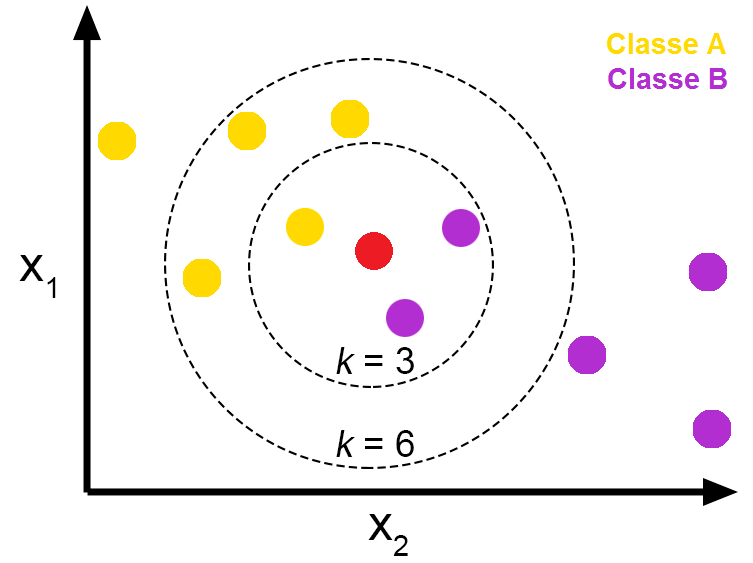

In [23]:
from sklearn.impute import KNNImputer

df_encoded = X_train.copy()
df_encoded['Gender'] = df_encoded['Gender'].map({'Male': 0, 'Female': 1})
df_encoded['Married'] = df_encoded['Married'].map({'No': 0, 'Yes': 1})


# Initialize KNN Imputer
imputer = KNNImputer(n_neighbors=3)

# Impute the missing values
df_imputed = imputer.fit_transform(df_encoded)

# Convert back to a DataFrame
df_imputed = pd.DataFrame(df_imputed, columns=df.columns)

df_imputed.head()

,Age,Income,Gender,Married
0,34.666667,60000.000000,0.0,0.0
1,50.000000,120000.000000,1.0,0.0
2,25.000000,50000.000000,0.0,1.0
3,39.000000,71666.666667,0.0,0.0
4,35.000000,63333.333333,0.0,0.0
